# **Business Intelligence Specialist - Mercado Libre**

Caso: El equipo comercial quiere realizar estrategias focalizadas para los sellers, pero en este momento no existe una clasificación que permita identificar a aquellos que tienen un **buen perfil** y son **relevantes para el negocio**. ¿Cómo podrías ayudar al equipo comercial a identificar estos sellers?

_____________________

## Configuración inicial

Conexión a la API de Mercado Libre para el mercado Méxicano en búsqueda de sellers relevantes dentro de una categoría:

In [3]:
# Importar librerias usadas en el estudio
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
pip install requests pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Revisar categorías disponibles en Mercado Libre México
cats = requests.get('https://api.mercadolibre.com/sites/MLM/categories')
cats.json()

[{'id': 'MLM1747', 'name': 'Accesorios para Vehículos'},
 {'id': 'MLM189530', 'name': 'Agro'},
 {'id': 'MLM1403', 'name': 'Alimentos y Bebidas'},
 {'id': 'MLM1071', 'name': 'Animales y Mascotas'},
 {'id': 'MLM1367', 'name': 'Antigüedades y Colecciones'},
 {'id': 'MLM1368', 'name': 'Arte, Papelería y Mercería'},
 {'id': 'MLM1743', 'name': 'Autos, Motos y Otros'},
 {'id': 'MLM1384', 'name': 'Bebés'},
 {'id': 'MLM1246', 'name': 'Belleza y Cuidado Personal'},
 {'id': 'MLM1039', 'name': 'Cámaras y Accesorios'},
 {'id': 'MLM1051', 'name': 'Celulares y Telefonía'},
 {'id': 'MLM1648', 'name': 'Computación'},
 {'id': 'MLM1144', 'name': 'Consolas y Videojuegos'},
 {'id': 'MLM1500', 'name': 'Construcción'},
 {'id': 'MLM1276', 'name': 'Deportes y Fitness'},
 {'id': 'MLM1575', 'name': 'Electrodomésticos'},
 {'id': 'MLM1000', 'name': 'Electrónica, Audio y Video'},
 {'id': 'MLM186863', 'name': 'Herramientas'},
 {'id': 'MLM1574', 'name': 'Hogar, Muebles y Jardín'},
 {'id': 'MLM1499', 'name': 'Industri

Se elige la categoría "Computación" para el estudio:

In [81]:
# Selección básica
site_id = 'MLM' # Mercado Libre México
cat_id = 'MLM1403' # Alimentos y Bebidas
base_url = 'https://api.mercadolibre.com/'

In [83]:
# Obtener los datos por producto
def get_prod(cat_id, limit=10, offset=0):
    """
    Obtiene productos de una categoría específica de Mercado Libre.
    """
    url = f"{base_url}/sites/{site_id}/search"
    params = {
        "category": cat_id,
        "limit": limit,
        "offset": offset
    }

    try:
        # Generar y mostrar la URL completa
        full_url = requests.Request('GET', url, params=params).prepare().url
        print(f"URL generada: {full_url}")  # Verifica la URL
        
        # Realizar la solicitud
        response = requests.get(full_url)
        print(f"Código de estado: {response.status_code}")  # Verifica el código de respuesta
        response.raise_for_status()
        
        # Devuelve la respuesta en JSON
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error en la solicitud: {e}")
        return {}  # Devuelve un diccionario vacío en caso de error

In [85]:
# Llamar a la función y mostrar resultados
data = get_prod(cat_id, limit=5, offset=0)  # Obtener los primeros 5 productos
if data and 'results' in data:
    print("Productos obtenidos:")
    for product in data['results']:
        print(f"- {product['title']} (ID: {product['id']})")
else:
    print("No se encontraron productos o hubo un error.")

URL generada: https://api.mercadolibre.com//sites/MLM/search?category=MLM1403&limit=5&offset=0
Código de estado: 200
Productos obtenidos:
- Tequila Gran Malo Duopack Tamarindo + Horchata 750ml (ID: MLM3246591738)
- Ositos De Gomita De Colores Tipo Pandita Lucky Gummys 1 Kg (ID: MLM1491476810)
- Gourmet & Healthy Té Chai Bengala 0 Azúcar 800g (ID: MLM2131206327)
- Licor Con Tequila Barullo Spicy Sandía 750ml (ID: MLM2896004982)
- Miel Black Horse Honey Vital 24 Sobres De 10g Sabor Original Dulce Amargo (ID: MLM2202606043)


In [87]:
# Proceso de recolección de productos
products = []
offset = 0
limit = 50

while True:
    print(f"Solicitando productos con offset {offset}...")
    data = get_prod(cat_id, limit=limit, offset=offset)
    
    if data and 'results' in data:
        print(f"Productos obtenidos: {len(data['results'])}")  # Cuántos productos se obtuvieron
        products.extend(data['results'])
        
        offset += limit
        if 'paging' in data and offset >= data['paging']['total']:
            print("Se alcanzó el límite total de resultados.")
            break
    else:
        print("No se encontraron más datos o hubo un error.")
        break

# Mostrar resultados finales
print(f"Total de productos recolectados: {len(products)}")

Solicitando productos con offset 0...
URL generada: https://api.mercadolibre.com//sites/MLM/search?category=MLM1403&limit=50&offset=0
Código de estado: 200
Productos obtenidos: 50
Solicitando productos con offset 50...
URL generada: https://api.mercadolibre.com//sites/MLM/search?category=MLM1403&limit=50&offset=50
Código de estado: 200
Productos obtenidos: 50
Solicitando productos con offset 100...
URL generada: https://api.mercadolibre.com//sites/MLM/search?category=MLM1403&limit=50&offset=100
Código de estado: 200
Productos obtenidos: 49
Solicitando productos con offset 150...
URL generada: https://api.mercadolibre.com//sites/MLM/search?category=MLM1403&limit=50&offset=150
Código de estado: 200
Productos obtenidos: 50
Solicitando productos con offset 200...
URL generada: https://api.mercadolibre.com//sites/MLM/search?category=MLM1403&limit=50&offset=200
Código de estado: 200
Productos obtenidos: 50
Solicitando productos con offset 250...
URL generada: https://api.mercadolibre.com//si

In [95]:
# Función para obtener información del seller
def get_seller_info(seller_id, cache={}):
    if seller_id in cache:
        return cache[seller_id]
    url = f"{base_url}/users/{seller_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        seller_info = {
            "seller_name": data.get("nickname"),
            "seller_reputation": data.get("seller_reputation", {}).get("level_id"),
            "transactions_completed": data.get("seller_reputation", {}).get("transactions", {}).get("completed"),
        }
        cache[seller_id] = seller_info
        return seller_info
    except requests.exceptions.RequestException as e:
        print(f"Error al obtener información del seller {seller_id}: {e}")
        return None

In [97]:
max_offset = 999  # Límite de offset permitido

while True:
    # Verificar que el offset no exceda el máximo permitido
    if offset >= max_offset:
        print(f"Se alcanzó el límite máximo de offset: {max_offset}")
        break
    
    # Solicitar productos con el offset actualizado
    data = get_prod(cat_id, limit=limit, offset=offset)
    
    # Verificar si los datos fueron obtenidos correctamente
    if data and 'results' in data:
        # Agregar los productos obtenidos a la lista
        products.extend(data['results'])
        
        # Incrementar el offset para la siguiente solicitud
        offset += limit
        
        # Verificar si hemos alcanzado el total de productos disponibles
        if 'paging' in data and offset >= data['paging']['total']:
            print(f"Se alcanzó el límite total de resultados: {offset}")
            break
    else:
        print("No se encontraron más datos o hubo un error.")
        break

# Mostrar resultados finales
print(f"Total de productos recolectados: {len(products)}")

Se alcanzó el límite máximo de offset: 999
Total de productos recolectados: 998


In [99]:
# Crear DataFrame inicial
df = pd.DataFrame(products)

# Extraer seller_id e información del seller
df["seller_id"] = df["seller"].apply(lambda x: x["id"] if isinstance(x, dict) else None)
seller_data = df["seller_id"].apply(get_seller_info)
df["seller_name"] = seller_data.apply(lambda x: x.get("seller_name") if x else None)
df["seller_reputation"] = seller_data.apply(lambda x: x.get("seller_reputation") if x else None)
df["transactions_completed"] = seller_data.apply(lambda x: x.get("transactions_completed") if x else None)

# Limpiar DataFrame final
df = df[[
    "id", "category_id", "domain_id", "title", "currency_id", 
    "price", "original_price", "seller_name", "seller_reputation", 
    "available_quantity"
]]

# Mostrar DataFrame enriquecido
print(df.head())

              id category_id     domain_id  \
0  MLM3246591738   MLM185381  MLM-TEQUILAS   
1  MLM1491476810   MLM185698   MLM-CANDIES   
2  MLM2131206327   MLM194330       MLM-TEA   
3  MLM2896004982   MLM185388   MLM-LIQUORS   
4  MLM2202606043   MLM185697     MLM-HONEY   

                                               title currency_id   price  \
0  Tequila Gran Malo Duopack Tamarindo + Horchata...         MXN  564.17   
1  Ositos De Gomita De Colores Tipo Pandita Lucky...         MXN   83.00   
2    Gourmet & Healthy Té Chai Bengala 0 Azúcar 800g         MXN  289.00   
3       Licor Con Tequila Barullo Spicy Sandía 750ml         MXN  298.00   
4  Miel Black Horse Honey Vital 24 Sobres De 10g ...         MXN  720.00   

   original_price         seller_name seller_reputation  available_quantity  
0          752.23          BLN BRANDS           5_green                 250  
1             NaN   SOCIEDADCONFITERA           5_green                 500  
2             NaN              A

In [101]:
# Crear una columna de porcentaje de descuento
df['discount'] = ((df['original_price'] - df['price']) / df['original_price']) * 100  

df.head()

,id,category_id,domain_id,title,currency_id,price,original_price,seller_name,seller_reputation,available_quantity,discount
0,MLM3246591738,MLM185381,MLM-TEQUILAS,Tequila Gran Malo Duopack Tamarindo + Horchata...,MXN,564.17,752.23,BLN BRANDS,5_green,250,25.000332
1,MLM1491476810,MLM185698,MLM-CANDIES,Ositos De Gomita De Colores Tipo Pandita Lucky...,MXN,83.00,NaN,SOCIEDADCONFITERA,5_green,500,NaN
2,MLM2131206327,MLM194330,MLM-TEA,Gourmet & Healthy Té Chai Bengala 0 Azúcar 800g,MXN,289.00,NaN,ALIFOZ,5_green,1,NaN
3,MLM2896004982,MLM185388,MLM-LIQUORS,Licor Con Tequila Barullo Spicy Sandía 750ml,MXN,298.00,NaN,NACION TEQUILA,5_green,5000,NaN
4,MLM2202606043,MLM185697,MLM-HONEY,Miel Black Horse Honey Vital 24 Sobres De 10g ...,MXN,720.00,NaN,BLACKHORSEHONEY_MX,5_green,1,NaN


## Análsis exploratorio

In [103]:
# Resumen de tipos de datos y valores nulos
print("Resumen de datos:")
print(df.info())

# Estadísticas descriptivas de columnas numéricas
print("   ")
print("Estadística descriptiva básica:")
print(df.describe())

# Verificar si hay valores nulos
print("   ")
print("Nulls por categoría:")
print(df.isnull().sum())

Resumen de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  998 non-null    object 
 1   category_id         998 non-null    object 
 2   domain_id           998 non-null    object 
 3   title               998 non-null    object 
 4   currency_id         998 non-null    object 
 5   price               998 non-null    float64
 6   original_price      261 non-null    float64
 7   seller_name         998 non-null    object 
 8   seller_reputation   998 non-null    object 
 9   available_quantity  998 non-null    int64  
 10  discount            261 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 85.9+ KB
None
   
Estadística descriptiva básica:
             price  original_price  available_quantity    discount
count   998.000000      261.000000          998.000000  261.000000
me

### Distribución de Precios

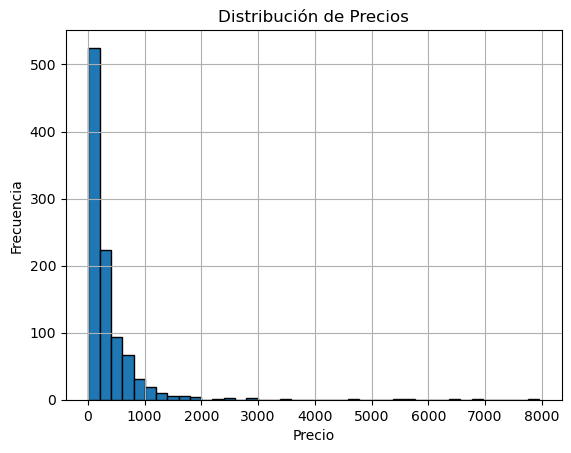

In [105]:
# Histograma de precios
df['price'].hist(bins=40, edgecolor='black')
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

### Análisis de Precios Originales vs. Precios de Venta

In [113]:
# Ver los productos con mayor descuento
print(df.sort_values('discount', ascending=False).head(10))

                id category_id            domain_id  \
140  MLM2937576136   MLM185698          MLM-CANDIES   
554  MLM2562723408   MLM185698          MLM-CANDIES   
234  MLM3453195330   MLM189612             MLM-GINS   
359  MLM3453076212   MLM189612             MLM-GINS   
848  MLM3155031618   MLM193984  MLM-HAZELNUT_CREAMS   
946  MLM2164344505   MLM191667    MLM-ENERGY_DRINKS   
692  MLM1808749549   MLM194487          MLM-COOKIES   
496  MLM3398588880   MLM189608           MLM-VODKAS   
277  MLM1995520557   MLM185698          MLM-CANDIES   
459  MLM3492692680   MLM185382         MLM-WHISKEYS   

                                                 title currency_id    price  \
140  Pelon Mini Dulce Enchilado De Tamarindo 36 Pie...         MXN   131.12   
554  Malvalleno Mix Frutas Bombones Rellenos De Jal...         MXN   100.69   
234                           Ginebra Diega Rosa 950ml         MXN   287.15   
359                       Ginebra Diega Amarilla 950ml         MXN   287.15   

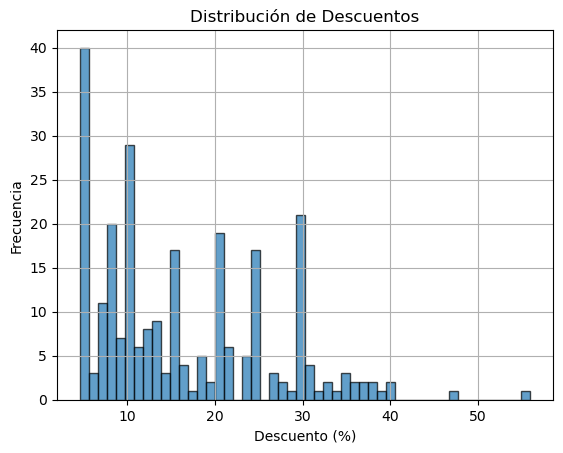

In [115]:
# Histograma de descuentos
df['discount'].dropna().hist(bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribución de Descuentos")
plt.xlabel("Descuento (%)")
plt.ylabel("Frecuencia")
plt.show()

### Cantidad de Productos Disponibles

In [142]:
# Resumen estadístico de cantidad disponible
print(df['available_quantity'].describe())

count     998.000000
mean      149.830661
std       555.506043
min         1.000000
25%         1.000000
50%         1.000000
75%       100.000000
max      5000.000000
Name: available_quantity, dtype: float64
0     250
1     500
2       1
3    5000
4       1
Name: available_quantity, dtype: int64


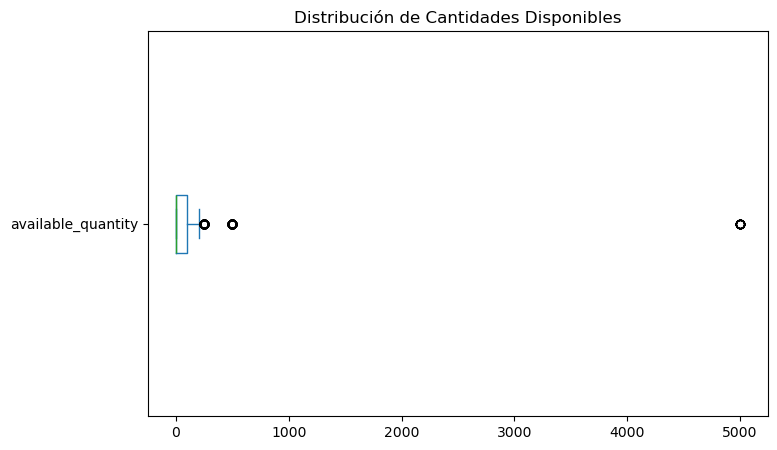

In [146]:
# Gráfico de distribución de cantidad disponible
df['available_quantity'].plot(kind='box', vert=False, figsize=(8, 5))
plt.title("Distribución de Cantidades Disponibles")
plt.show()

In [148]:
# Ordenar los productos por cantidad disponible de mayor a menor
sorted_products = df.sort_values(by='available_quantity', ascending=False)

# Seleccionar las columnas relevantes para visualizar
top_products = sorted_products[['id', 'title', 'available_quantity', 'price']]

# Mostrar los 10 productos con más cantidades disponibles
print("Top 10 productos con más cantidades disponibles:")
print(top_products.head(10))

Top 10 productos con más cantidades disponibles:
                id                                              title  \
116  MLM2876039220     Bola De Oro Café Exportacion 1 Kg Envio Gratis   
450  MLM1921511529     Pikaros Dulce De Tamarindo Con Chile, Ricolino   
279  MLM1736938870  Bola De Oro Café Molido Gourmet 1 Kilo Envio G...   
47   MLM1863461405  Soju Licor De Arroz Coreano Variedad De Sabore...   
922  MLM3012103606  Agua Fiji Artesanal Natural Importada 24pack D...   
43   MLM2172270409  Sidra Strongbow Variety Pack 12 Botellas De 330ml   
262  MLM2041852689       Bebida Jugo Pouch Caprisun Variado 6oz 40 Pz   
361  MLM1376470078                     Chicharrón De Cerdo Ramos 1 Kg   
290  MLM2574303894  Lingzhi Coffee 2 En 1 Dxn Sin Azúcar Y Con Gan...   
406  MLM2973774820  Gatorade Zero En Polvo Variado (sin Azúcar), P...   

     available_quantity   price  
116                5000  354.00  
450                5000  105.00  
279                5000  403.00  
47         

In [150]:
# Ordenar los productos por cantidad disponible de menor a mayor
sorted_products = df.sort_values(by='available_quantity', ascending=True)

# Seleccionar las columnas relevantes para visualizar
lower_products = sorted_products[['id', 'title', 'available_quantity', 'price']]

# Mostrar los 10 productos con más cantidades disponibles
print("Top 10 productos con más cantidades disponibles:")
print(lower_products.head(10))

Top 10 productos con más cantidades disponibles:
                id                                              title  \
498  MLM2016667595  Duo Pack Tequila Hijos De Villa Blanco Revolve...   
400  MLM1485271516          Propoleo Natural Concentrado Deliux 1250g   
399  MLM1402010342        Tequila Reposado Gran Centenario Azul 700ml   
708  MLM1633552769  Bebida Japonesa Ramune Sabor Mora Azul 200ml G...   
397  MLM2803229158  Combo Yerba Mate Rosamonte Tradicional (2 Bols...   
396  MLM3493033888     Whisky Johnnie Walker Blue Label Blended 750ml   
709  MLM2818501874                                   Vodka Skyy 750ml   
393  MLM3295273330          Quinoa Blanca Perlada Calidad Premium 3kg   
391  MLM2176170827               Tequila 1800 Blanco 100% Agave 700ml   
713  MLM1644523410  Salsa Mango Habanero 4.3kg Custom Culinary Zaf...   

     available_quantity    price  
498                   1   999.00  
400                   1   140.00  
399                   1   217.80  
708    

### Análisis de Productos por Vendedor

In [121]:
seller_counts = df['seller_name'].value_counts()

# Mostrar los vendedores con más productos
top_sellers = seller_counts.head(10)
print(top_sellers)

seller_name
MERCADOLIBRE CPG_MX           50
ENDAROO ECOMMERCE             43
COMERCIANTE GALACTICO         42
NACION TEQUILA                29
VENDEMOS VINO                 28
MI GRANERO                    25
DISFRUTO NUTS                 24
LACASTELLANAENMERCADOLIBRE    22
GRUPO AGNEZ                   22
DISTRIBUIDORA ZAMORA          21
Name: count, dtype: int64


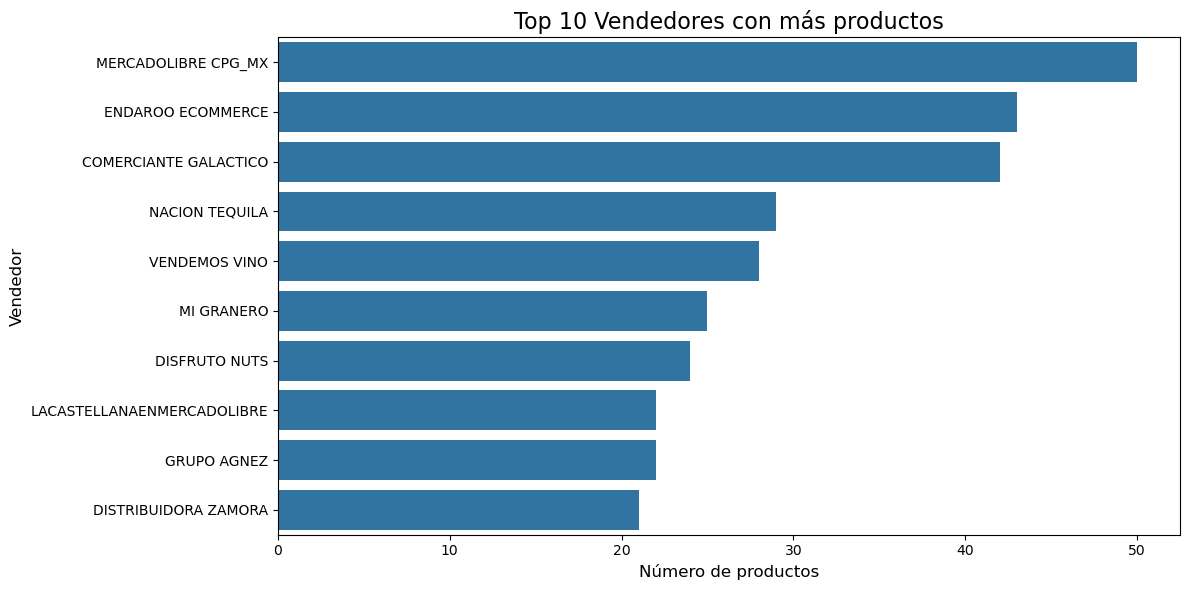

In [123]:
# Gráfica del número de productos por vendedor
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sellers.values, y=top_sellers.index)

plt.title("Top 10 Vendedores con más productos", fontsize=16)
plt.xlabel("Número de productos", fontsize=12)
plt.ylabel("Vendedor", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

In [125]:
# Comparar precios promedio por vendedor
avg_price_by_seller = df.groupby('seller_name')['price'].mean()
avg_price_by_seller = avg_price_by_seller.sort_values(ascending=False)
print(' ')
print(' ')
print(avg_price_by_seller.head(10))

 
 
seller_name
TRYFAM                           2965.000000
FLOSEOPERADORA                   2830.000000
ECOSHOPMASTER                    2431.824000
TEQUILADONRAMÓN PERSONALIZADO    2236.625000
AUTOPARTES_REVO                  1838.000000
BAJAMAR SEAWATER                 1820.000000
TIA ALIMENTOS                    1599.000000
VIVRISHOP                        1591.990000
BEBIDASXMENOS                    1553.428571
TRENTO33                         1477.500000
Name: price, dtype: float64


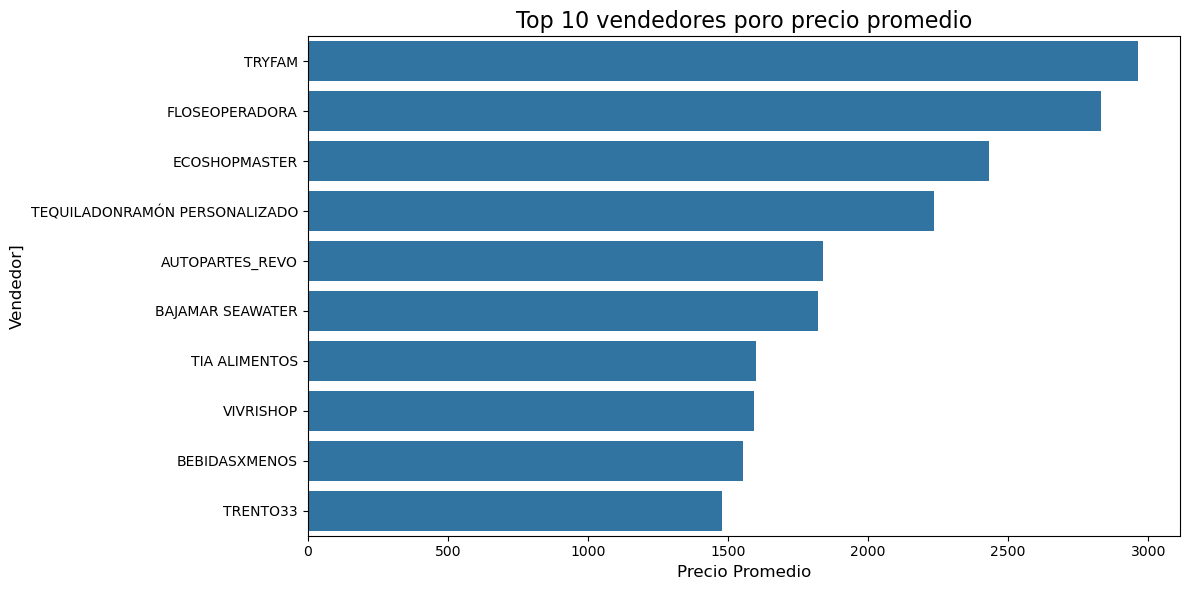

In [127]:
# Gráfica del mayores precios promedio de productos por vendedor
top_avg_price_sellers = avg_price_by_seller.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_avg_price_sellers.values, y=top_avg_price_sellers.index)

plt.title("Top 10 vendedores poro precio promedio", fontsize=16)
plt.xlabel("Precio Promedio", fontsize=12)
plt.ylabel("Vendedor]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

### Análisis de Precios por Subcategoría

In [129]:
# Análisis de precio promedio por subcategoría
avg_price_by_subcategory = df.groupby('domain_id')['price'].mean()
avg_price_by_subcategory = avg_price_by_subcategory.sort_values(ascending=False)
print(avg_price_by_subcategory.head(10))

domain_id
MLM-WHISKEYS                    1290.207647
MLM-TONIC_WATERS                1080.833333
MLM-TEQUILAS                     847.316518
MLM-COGNACS                      809.000000
MLM-BREAD_CRUMBS                 749.000000
MLM-READY_TO_DRINK_COCKTAILS     740.607778
MLM-BEERS                        589.855714
MLM-APERITIFS                    543.000000
MLM-FOODS_AND_DRINKS             502.230000
MLM-SPORTS_DRINKS                481.791818
Name: price, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'MLM-WHISKEYS'),
  Text(0, 1, 'MLM-TONIC_WATERS'),
  Text(0, 2, 'MLM-TEQUILAS'),
  Text(0, 3, 'MLM-COGNACS'),
  Text(0, 4, 'MLM-BREAD_CRUMBS'),
  Text(0, 5, 'MLM-READY_TO_DRINK_COCKTAILS'),
  Text(0, 6, 'MLM-BEERS'),
  Text(0, 7, 'MLM-APERITIFS'),
  Text(0, 8, 'MLM-FOODS_AND_DRINKS'),
  Text(0, 9, 'MLM-SPORTS_DRINKS')])

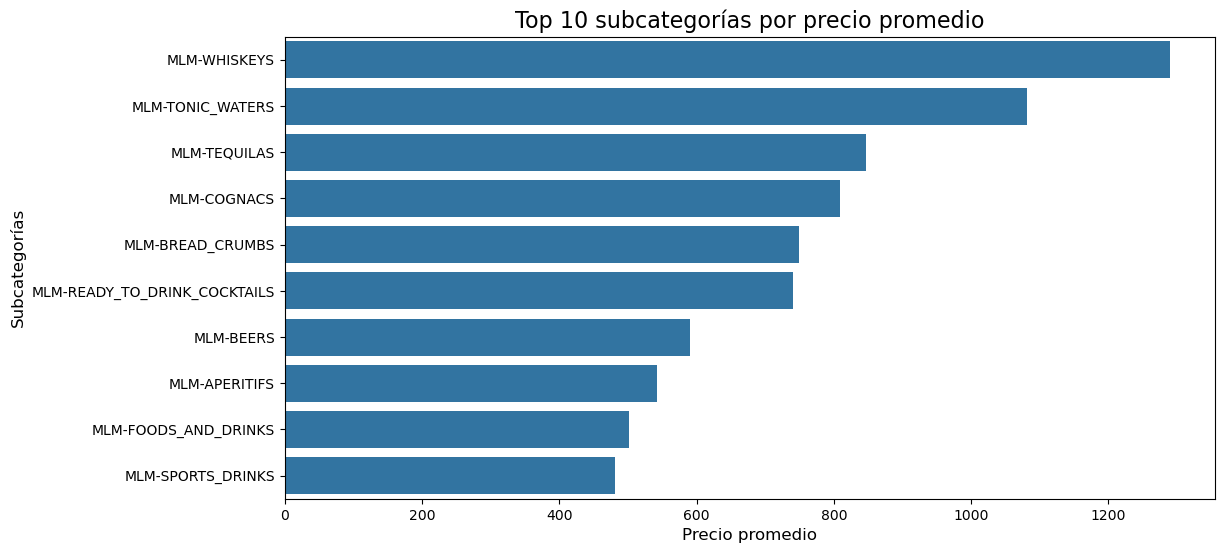

In [131]:
# Top 10 subcategorías por precio promedio
top_avg_price_subcategories = avg_price_by_subcategory.head(10)

# Gráfica de top 10 subcategorías por precio promedio
plt.figure(figsize=(12, 6))
sns.barplot(x=top_avg_price_subcategories.values, y=top_avg_price_subcategories.index)

plt.title("Top 10 subcategorías por precio promedio", fontsize=16)
plt.xlabel("Precio promedio", fontsize=12)
plt.ylabel("Subcategorías", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

### Precios por productos

In [133]:
# Productos más caros
print("Productos más caros:")
df.sort_values('price', ascending=False).head(10)

Productos más caros:


,id,category_id,domain_id,title,currency_id,price,original_price,seller_name,seller_reputation,available_quantity,discount
893,MLM2196935489,MLM185382,MLM-WHISKEYS,Whisky Buchanan's Deluxe 12 Años Blended 750 M...,MXN,7958.04,9588.0,ECOSHOPMASTER,5_green,1,17.0
746,MLM3049760562,MLM185382,MLM-WHISKEYS,Whisky Johnnie Walker Black Label 750ml Pack 1...,MXN,6855.00,NaN,BEBIDASXMENOS,5_green,1,NaN
703,MLM3482865264,MLM185381,MLM-TEQUILAS,Caja De 12 Tequila Maestro Dobel Diamante Cris...,MXN,6439.08,6999.0,WALMART3X2,5_green,1,8.0
773,MLM2162351073,MLM185381,MLM-TEQUILAS,Tequila Don Ramón Edición Limitada Añejo Luis ...,MXN,5764.00,NaN,TEQUILADONRAMÓN PERSONALIZADO,5_green,1,NaN
396,MLM3493033888,MLM185382,MLM-WHISKEYS,Whisky Johnnie Walker Blue Label Blended 750ml,MXN,5503.00,NaN,FLOSEOPERADORA,5_green,1,NaN
747,MLM3463234038,MLM185381,MLM-TEQUILAS,Tequila Don Ramón Edición Limitada Plata Luis ...,MXN,4609.00,NaN,TEQUILADONRAMÓN PERSONALIZADO,5_green,1,NaN
185,MLM3102165350,MLM185381,MLM-TEQUILAS,Clase Azul Tequila Reposado 750 Ml,MXN,3553.50,NaN,LACASTELLANAENMERCADOLIBRE,5_green,50,NaN
425,MLM3032256472,MLM194303,MLM-SPORTS_DRINKS,Pruvit Keto Os 1 Caja C/20 Cetonas Dulce Agrio...,MXN,2965.00,NaN,TRYFAM,5_green,1,NaN
26,MLM2126486995,MLM185381,MLM-TEQUILAS,Don Ramón Trilogía Platinum Edición Luis Miguel,MXN,2834.00,NaN,TEQUILADONRAMÓN PERSONALIZADO,5_green,1,NaN
461,MLM2139625969,MLM194298,MLM-JUICES,Jugo Tahitian Noni Nonilíquido Pack X 4,MXN,2799.00,NaN,AUTOPARTES_REVO,5_green,1,NaN


In [135]:
# Productos más baratos
print("Productos más baratos:")
df.sort_values('price', ascending=True).head(10)

Productos más baratos:


,id,category_id,domain_id,title,currency_id,price,original_price,seller_name,seller_reputation,available_quantity,discount
507,MLM2055738713,MLM194476,MLM-PASTAS,La Moderna Pasta Para Sopa Fideo 2 Fideo Grues...,MXN,8.79,NaN,COMERCIANTE GALACTICO,5_green,100,NaN
733,MLM1503259131,MLM191212,MLM-CANNED_AND_PRESERVED_FOOD,Frijoles Bayos La Costeña Refritos 220g,MXN,14.50,NaN,COMPAÑIA PRAGA,5_green,1,NaN
645,MLM1449374111,MLM191212,MLM-CANNED_AND_PRESERVED_FOOD,Atún En Agua 130g Tuny,MXN,19.80,NaN,COMERCIANTE GALACTICO,5_green,500,NaN
868,MLM1465428678,MLM193860,MLM-COOKING_CREAMS,Media Crema Nestlé Lata 225g,MXN,21.00,NaN,COMERCIANTE GALACTICO,5_green,50,NaN
452,MLM1527918118,MLM194487,MLM-COOKIES,Galletas Cuétara Surtido Clásico 170g,MXN,21.00,NaN,COMERCIANTE GALACTICO,5_green,1,NaN
377,MLM1451004581,MLM193739,MLM-MILK,Producto Lácteo Combinado Nutri Entera 1l,MXN,21.98,NaN,COMERCIANTE GALACTICO,5_green,150,NaN
894,MLM3317970756,MLM191212,MLM-CANNED_AND_PRESERVED_FOOD,Atún Herdez En Agua Lata 130g,MXN,23.00,NaN,ABASTOS_CADEL,5_green,1,NaN
108,MLM3369627608,MLM185722,MLM-RICE,Arroz Schettino Extra 900 G,MXN,23.00,NaN,NDONI.MX,5_green,1,NaN
317,MLM1837505108,MLM191330,MLM-SOFT_DRINKS,Refresco Cupa Chups Sabor Frambuesas Con Crema...,MXN,24.00,NaN,TOYO FOODS,5_green,150,NaN
94,MLM2101229395,MLM189791,MLM-OATMEAL,Avena Granvita Hojuela Tradicional En Bolsa 700g,MXN,24.20,NaN,GRUPOINDUSTRIALVIDASADECV,5_green,1,NaN


### Revisión de Vendedores por reputación

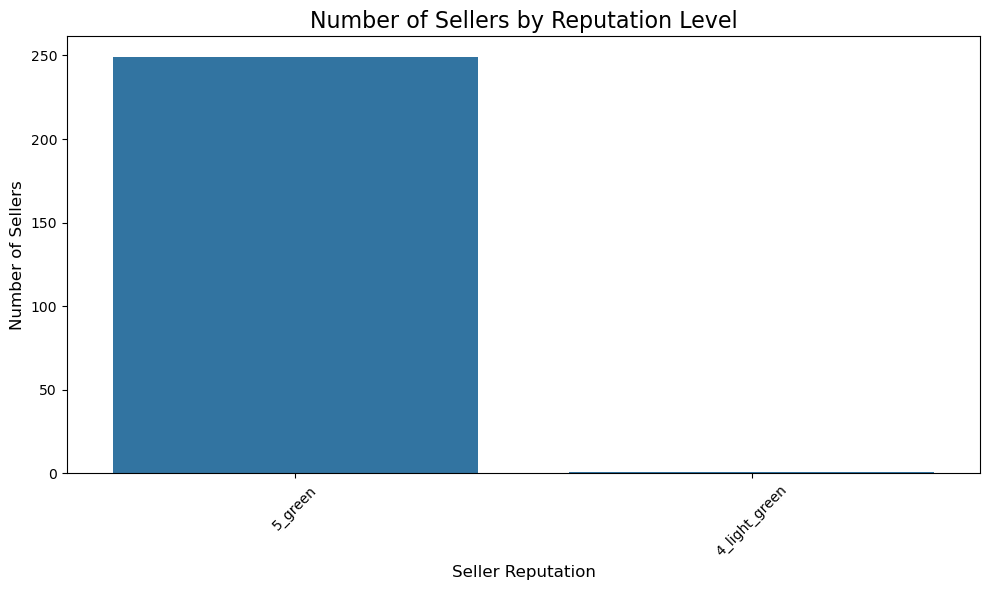

In [140]:
# Group by seller reputation and count the number of sellers
sellers_by_reputation = df.groupby('seller_reputation')['seller_name'].nunique()

# Sort values for a clear representation
sellers_by_reputation = sellers_by_reputation.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sellers_by_reputation.index, y=sellers_by_reputation.values)

# Add titles and labels
plt.title("Number of Sellers by Reputation Level", fontsize=16)
plt.xlabel("Seller Reputation", fontsize=12)
plt.ylabel("Number of Sellers", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()